In [14]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import simpleaudio as sa
import time
import sounddevice as sd
from scipy.io.wavfile import write
import soundfile as sf
import pyaudio
from scipy.signal import chirp, find_peaks, peak_widths

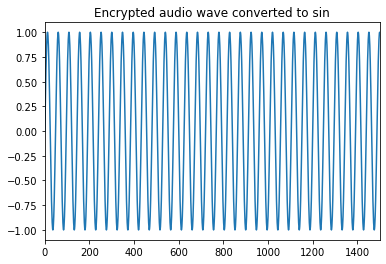

wait for message
recording


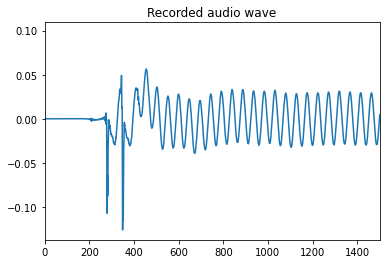

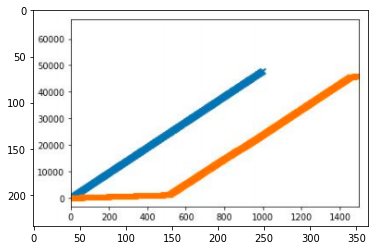

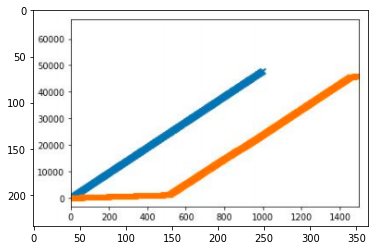

Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication request.
Not Authorised.... Some other user sending authentication requ

In [21]:
# inits
frequency = 1000
num_samples = 48000
sampling_rate = 48000.0
amplitude = 16000
sine_wave = [np.sin(2 * np.pi * frequency * x / sampling_rate)for x in range(num_samples)]
nframes = num_samples
comptype = "NONE"
compname = "not compressed"
nchannels = 1
sampwidth = 2
threshold_comp = .5
def create_wave():
    wav_file = wave.open("test.wav", 'w')
    wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes,
    comptype, compname))
    #CONVERTING SINE WAVE INTO SOUND WAVE
    for s in sine_wave:
        wav_file.writeframes(struct.pack('h', int(s * amplitude)))
    plt.title("Encrypted audio wave converted to sin")
    plt.xlim(0, 1500)
     # plt.ylim(0.005, -0.005)
    plt.plot(sine_wave)
    plt.show()
    plt.savefig("created_wave.png")
    plt.clf()
def plot_recorded():
    data, fs = sf.read("./recorded.wav", dtype='float32')
    plt.title("Recorded audio wave")
    plt.plot(data)
    plt.xlim(0, 1500)
    plt.show()
    plt.savefig("plotted_from_record.png")
    comparison_fast(sine_wave,data)
 #plt.ylim(0.005, -0.005)
def playrecording():
    #define stream chunk
    chunk = 1024
    #open a wav format music
    f = wave.open("test.wav","rb")
    #instantiate PyAudio
    p = pyaudio.PyAudio()
    #open stream
    stream = p.open(format = p.get_format_from_width(f.getsampwidth()),
    channels = f.getnchannels(),
    rate = f.getframerate(),
    output = True)
    #read data
    data = f.readframes(chunk)
    #play stream
    while data:
        stream.write(data)
        data = f.readframes(chunk)
    #stop stream
    stream.stop_stream()
    stream.close()
def record_sound():
    fs = 48000
    seconds = 4
    print('wait for message')
    time.sleep(4)
    print('recording')
    myrecording = sd.rec(int(seconds * amplitude), samplerate=int(sampling_rate),channels=nchannels)
    playrecording()
    sd.wait()
    write('sending.wav', fs, myrecording)
def wave_peaker(data):
    peaks, _ = find_peaks(data)
    widths_all = peak_widths(data, peaks)
#     plt.plot(peaks, "x")
#     plt.xlim(0, 1500)
    # plt.ylim(0.005, -0.005)
#     plt.savefig("peakers.png")
    img=mpimg.imread('peakers.png')
    imgplot = plt.imshow(img)
    plt.show()
    return [peaks, widths_all]
 #  Using a difference threshold and counting q of peaks
def comparison_fast(data1, data2):
    flag = 0
    p1, w1 = wave_peaker(data1)
    p2, w2 = wave_peaker(data2)
    for p in [p1, p2, w1, w2]:
        p = np.array(p)
        peak_sub = p1-p2[:len(p1)]
    width_sub=[]
    for i in range(0,len(w1)):
        width_sub.append(w1[i]-w2[i][:len(w1[i])])
    # no of peaks
    lenp1 = len(p1)
    lenp2 = len(p2)
    if(lenp1>=lenp2+3 and lenp1<=lenp2-3):
        flag = 1
    else:
        flag = 0
    
   #difference
    slope1=0
    slope2=0
    similarity=[]
    for i in range(0,len(p1)-1):
        slope1=(p1[i+1]-p1[i])/(1)
        slope2=(p2[i+1]-p2[i])/(1)
        x=slope1-slope2
        similarity.append(x<threshold_comp)
    #print(similarity)
    flag=0
    ctrue=0
    cfalse=0
    for i in range(0,len(similarity)):
        if(similarity[i]==True):
            flag=1
        if(flag==1 and similarity[i]==True):
            ctrue=ctrue+1
        if(flag==1 and similarity[i]==False):
            false=cfalse+1
        if(ctrue>(.8*(ctrue+cfalse))):
            print("Authenticated the correct user on your Side")
        else:
            print("Not Authorised.... Some other user sending authentication request.")
 #peak_sub = [x<threshold_comp for x in peak_sub]
 #width_sub = [x<threshold_comp for x in width_sub]
create_wave()
record_sound()
plot_recorded()